In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
compare_tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Breast_Mammary_Tissue','Colon_Transverse','Nerve_Tibial','Thyroid']
colors = sns.color_palette(["#D16D6D", "#F29F42", "#F1D63D", "#6DBE45", "#4A90D1", "#7B4B9F"])

In [2]:
def find_nearby_in_train(row, train_data, max_distance):
    # Extract chromosome and tss_distance for the row
    chromosome = row['variant_id'].split('_')[0]
    tss_distance = row['tss_distance']
    
    # Filter train_data for same chromosome and distance within the threshold
    same_chromosome = train_data[train_data['variant_id'].str.startswith(chromosome)]
    nearby = same_chromosome[abs(same_chromosome['tss_distance'] - tss_distance) <= max_distance]
    
    return nearby

def calculate_similarity_for_test(row, train_data, max_distance):
    nearby_in_train = find_nearby_in_train(row, train_data, max_distance)
    
    # Total number of nearby entries
    total_nearby = len(nearby_in_train)
    
    if total_nearby == 0:
        # If no nearby entries found, return 0 for both percentages and overlap lengths
        return 0.0, 0.0, 0, 0
    
    # Percentage of labels that match
    label_match_count = (nearby_in_train['label'] == row['label']).sum()
    label_match_percentage = (label_match_count / total_nearby) * 100
    
    # Percentage of bulks that match
    bulk_match_count = (nearby_in_train['bulk'] == row['bulk']).sum()
    bulk_match_percentage = (bulk_match_count / total_nearby) * 100
    
    # Calculate the maximum overlap length for matching labels
    label_match_nearby = nearby_in_train[nearby_in_train['label'] == row['label']]
    max_label_overlap_length = 0
    for _, train_row in label_match_nearby.iterrows():
        overlap_length = abs(train_row['tss_distance'] - row['tss_distance'])
        max_label_overlap_length = max(max_label_overlap_length, overlap_length)
    
    # Calculate the maximum overlap length for non-matching labels
    label_mismatch_nearby = nearby_in_train[nearby_in_train['label'] != row['label']]
    max_label_mismatch_overlap_length = 0
    for _, train_row in label_mismatch_nearby.iterrows():
        overlap_length = abs(train_row['tss_distance'] - row['tss_distance'])
        max_label_mismatch_overlap_length = max(max_label_mismatch_overlap_length, overlap_length)
    
    return label_match_percentage, bulk_match_percentage, max_label_overlap_length, max_label_mismatch_overlap_length

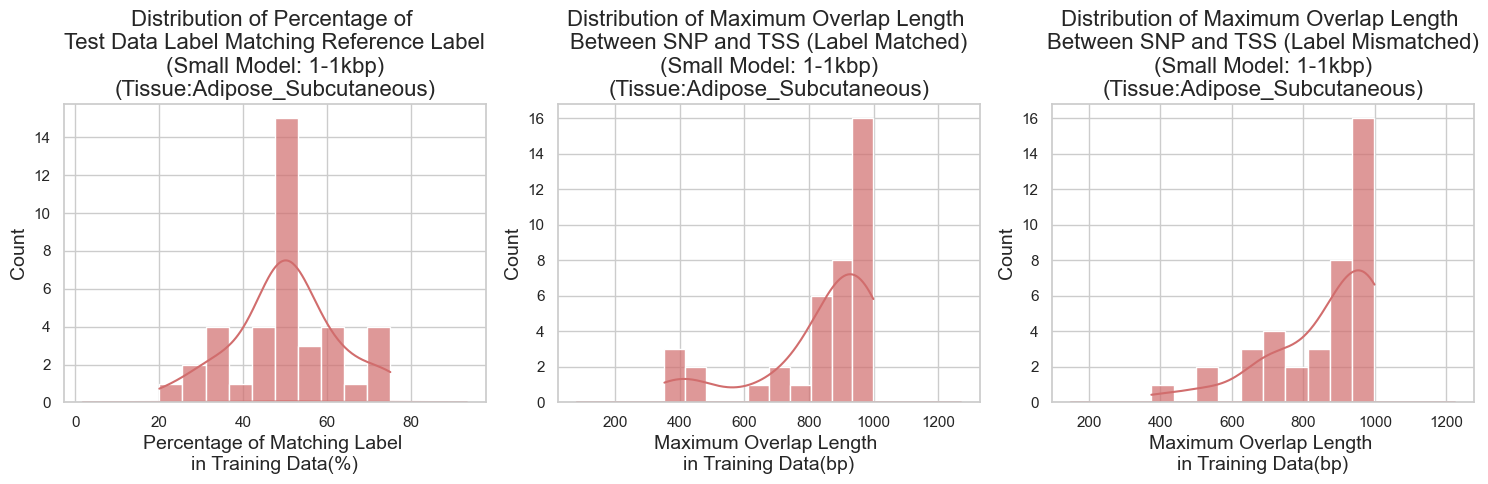

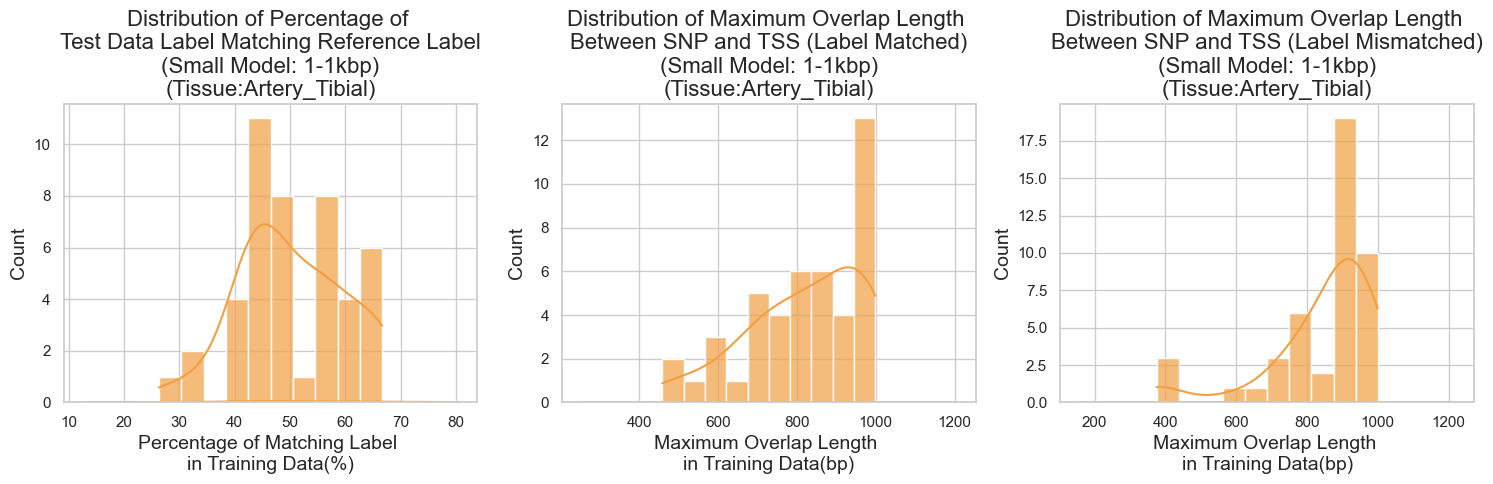

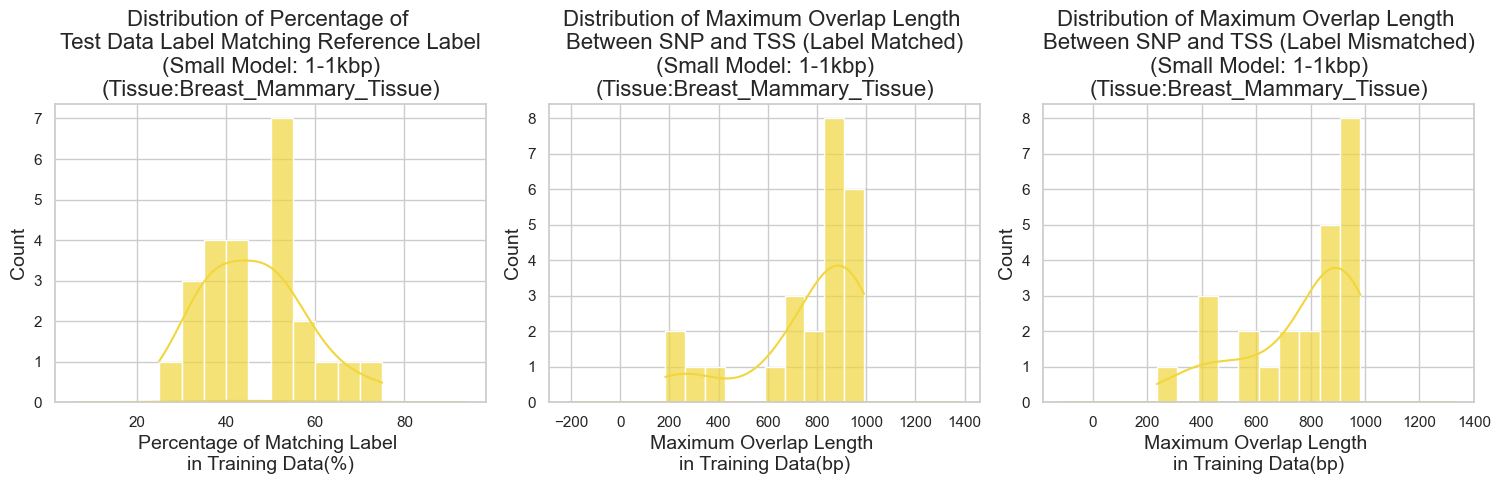

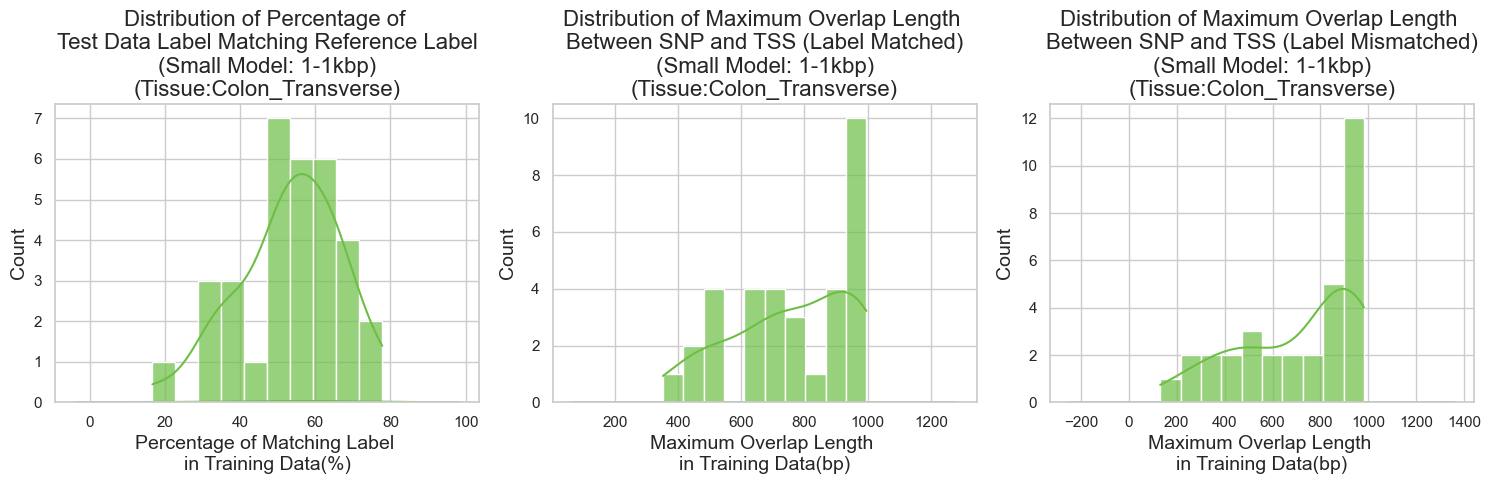

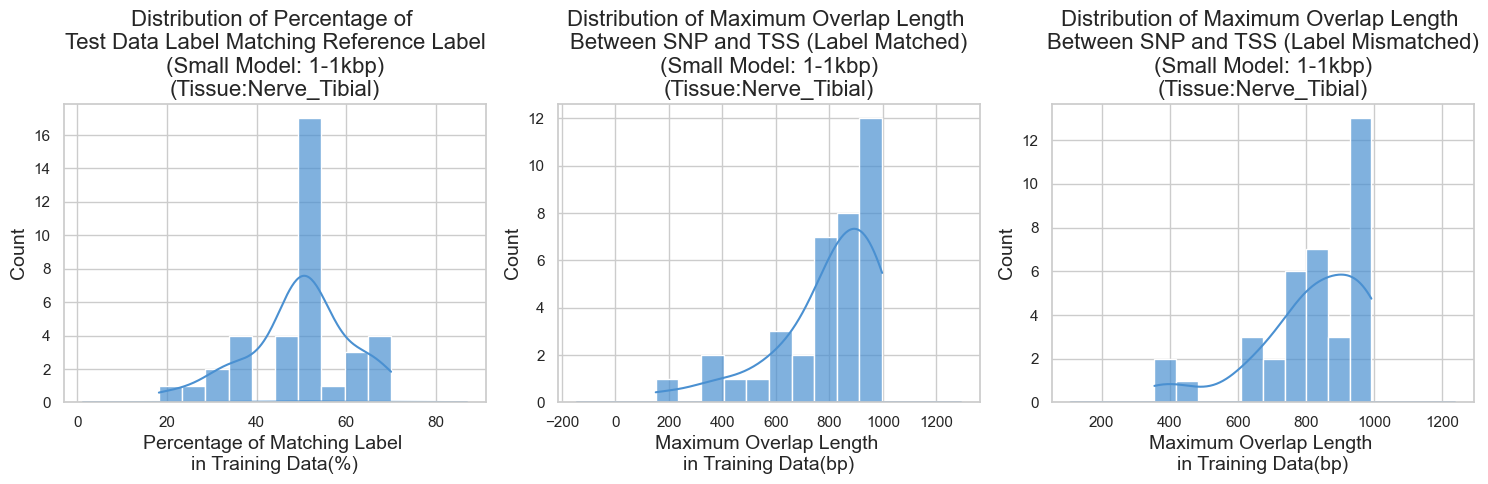

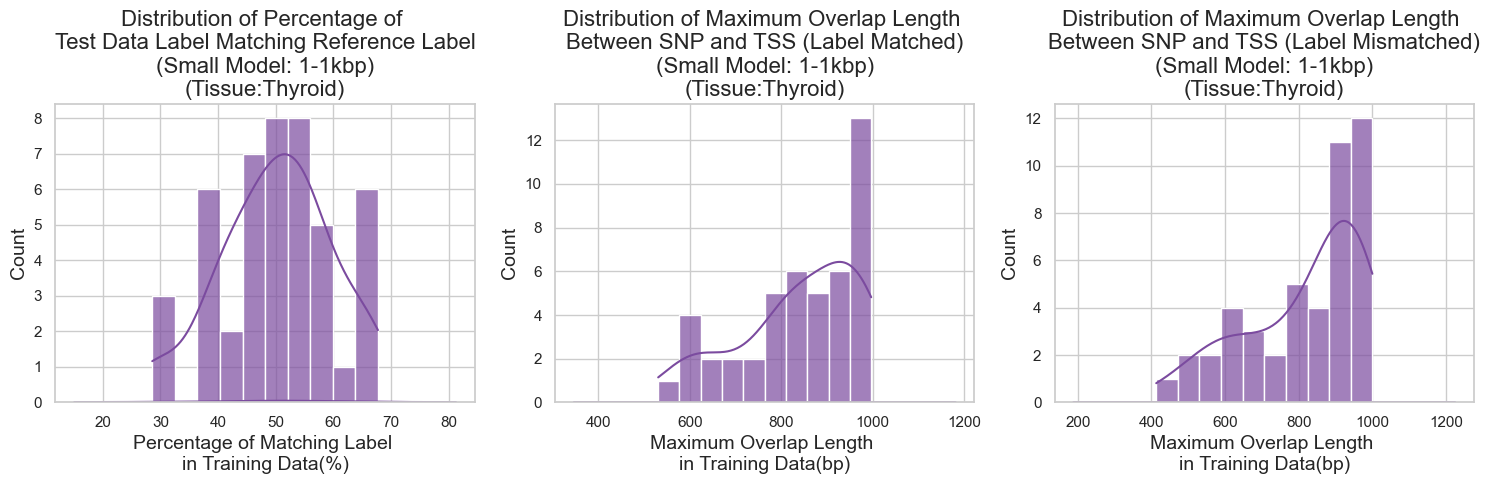

In [3]:
model_size = 'small'
max_distance = 1_000
for i in range(6):

    tissue = compare_tissue_list[i]

    train_data = pd.read_pickle('../datasets/tissue_specific/' + model_size + '/train_' + model_size + '_' + tissue + '.pkl')[['variant_id','tss_distance','label','bulk']]
    test_data = pd.read_pickle('../datasets/tissue_specific/' + model_size + '/test_' + model_size + '_' + tissue + '.pkl')[['variant_id','tss_distance','label','bulk']]
    #print(test_data.head())

    test_data[['label_match_percentage', 'bulk_match_percentage', 'max_label_overlap_length', 'max_label_mismatch_overlap_length']] = test_data.apply(
        lambda row: pd.Series(calculate_similarity_for_test(row, train_data, max_distance)), axis=1)
    #print(test_data.head())

    # Set up the figure and axes for plotting in a single row
    plt.figure(figsize=(15, 5))

    # Plot label_match_percentage distribution
    plt.subplot(1, 3, 1)
    sns.histplot(test_data['label_match_percentage'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['label_match_percentage'], color=colors[i], lw=2)
    plt.title('Distribution of Percentage of \nTest Data Label Matching Reference Label\n(Small Model: 1-1kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Percentage of Matching Label \nin Training Data(%)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Plot max_label_overlap_length distribution
    plt.subplot(1, 3, 2)
    sns.histplot(test_data['max_label_overlap_length'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['max_label_overlap_length'], color=colors[i], lw=2)
    plt.title('Distribution of Maximum Overlap Length \nBetween SNP and TSS (Label Matched)\n(Small Model: 1-1kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Maximum Overlap Length \nin Training Data(bp)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Plot max_label_mismatch_overlap_length distribution
    plt.subplot(1, 3, 3)
    sns.histplot(test_data['max_label_mismatch_overlap_length'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['max_label_mismatch_overlap_length'], color=colors[i], lw=2)
    plt.title('Distribution of Maximum Overlap Length \nBetween SNP and TSS (Label Mismatched)\n(Small Model: 1-1kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Maximum Overlap Length \nin Training Data(bp)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.savefig("images/tissue-specific/split-kde-" + model_size + '_' + tissue + ".png", dpi=300, bbox_inches = 'tight')
    plt.show()

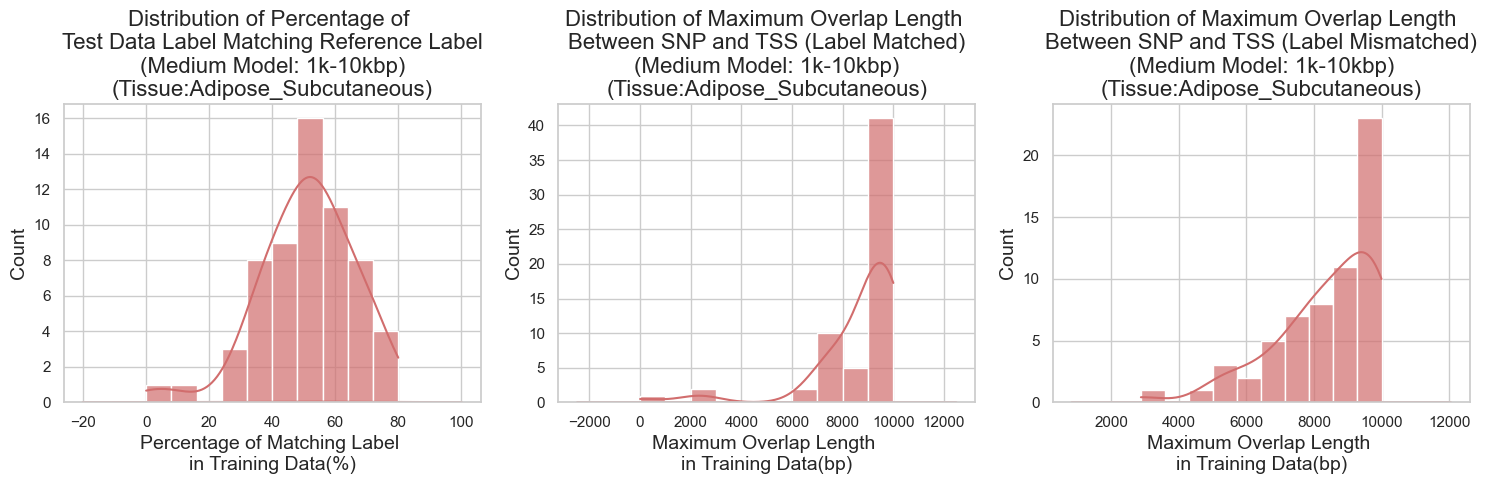

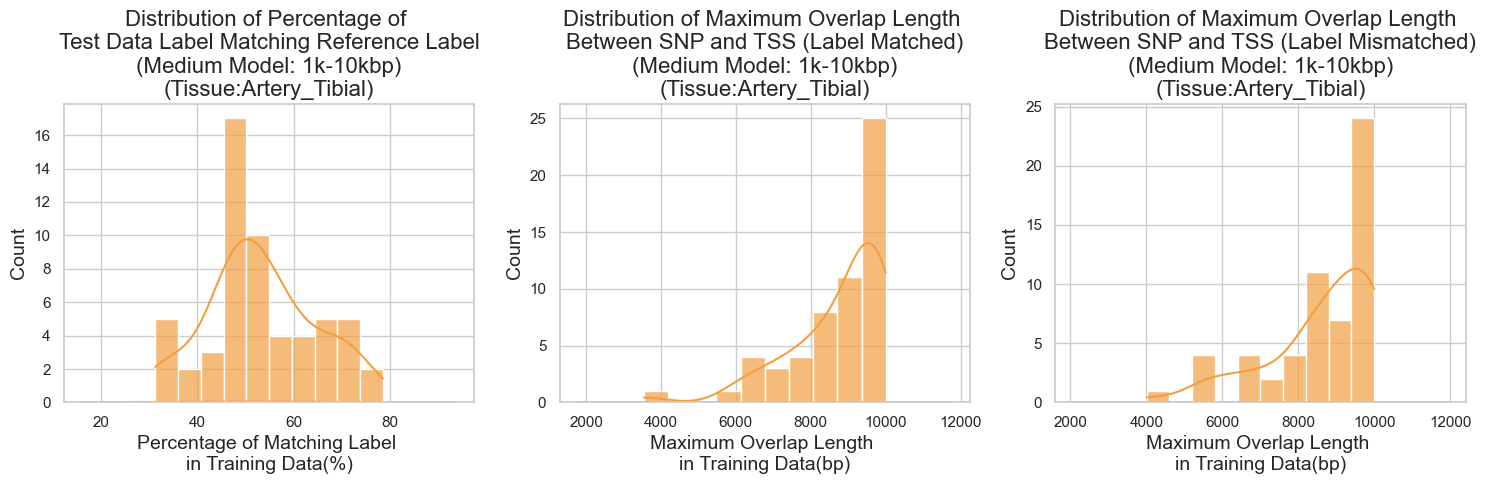

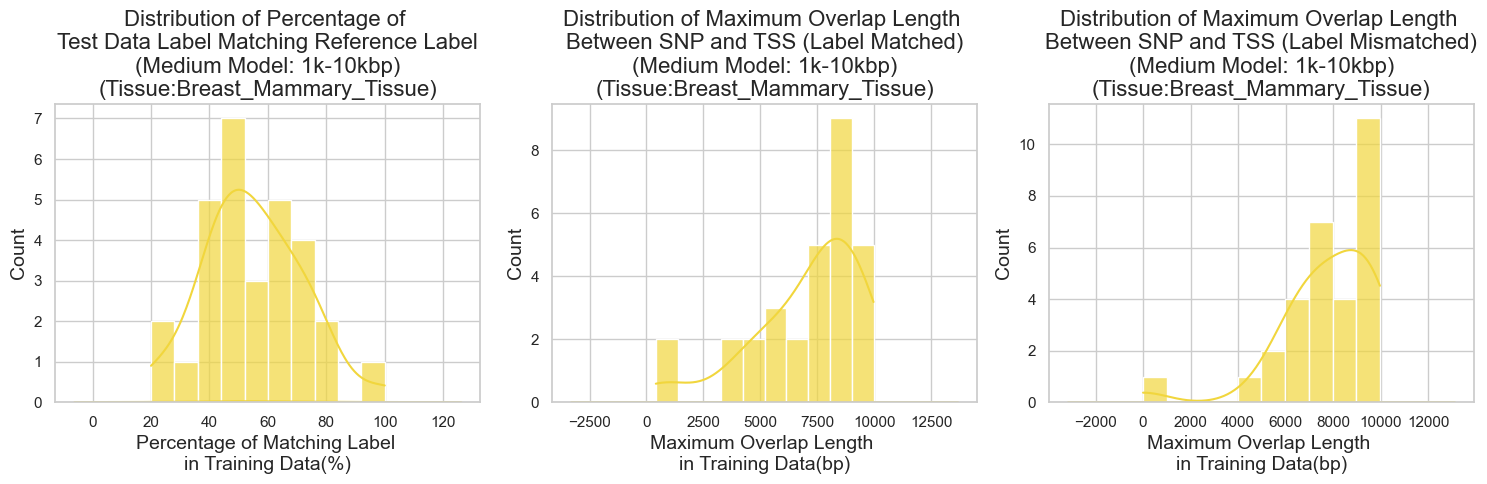

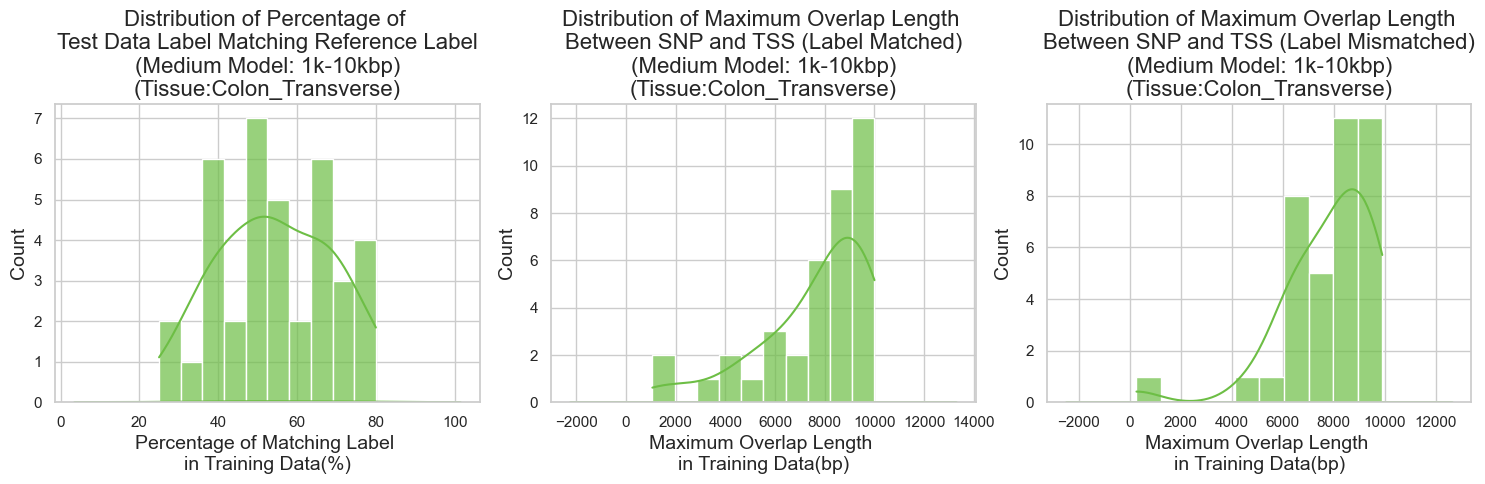

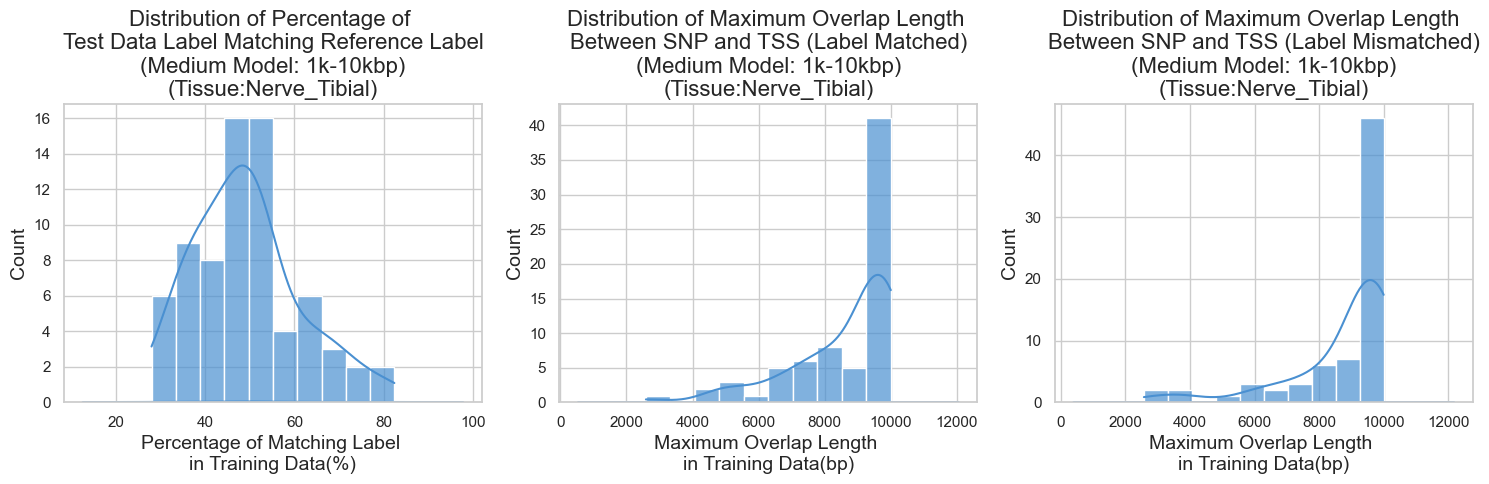

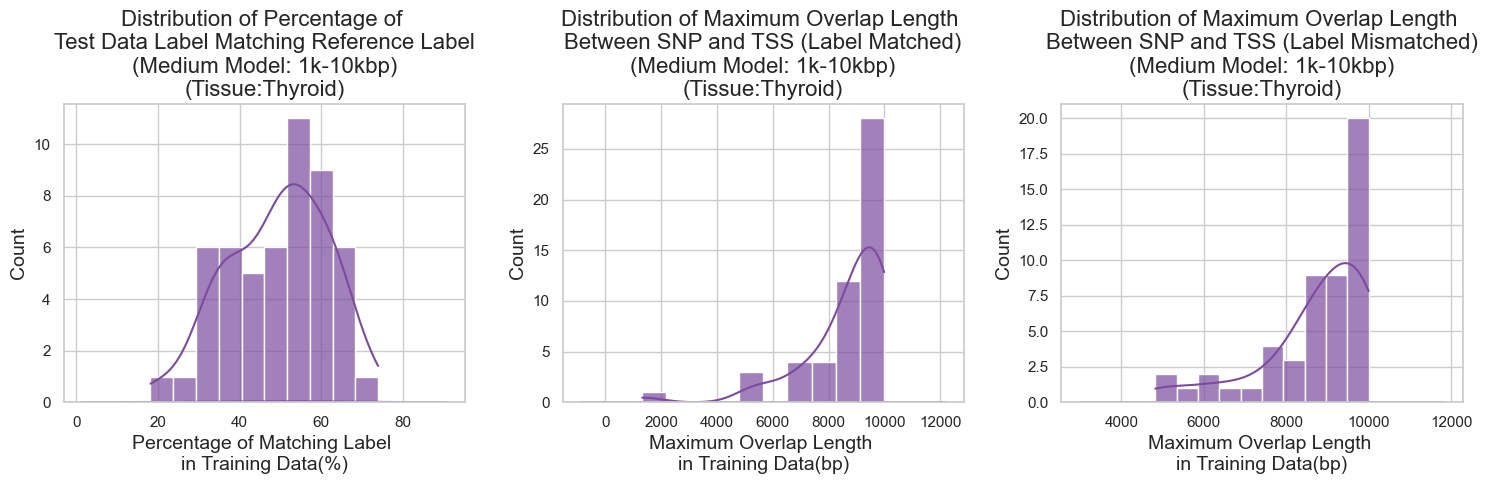

In [4]:
model_size = 'middle'
max_distance = 10_000
for i in range(6):

    tissue = compare_tissue_list[i]

    train_data = pd.read_pickle('../datasets/tissue_specific/' + model_size + '/train_' + model_size + '_' + tissue + '.pkl')[['variant_id','tss_distance','label','bulk']]
    test_data = pd.read_pickle('../datasets/tissue_specific/' + model_size + '/test_' + model_size + '_' + tissue + '.pkl')[['variant_id','tss_distance','label','bulk']]
    #print(test_data.head())

    test_data[['label_match_percentage', 'bulk_match_percentage', 'max_label_overlap_length', 'max_label_mismatch_overlap_length']] = test_data.apply(
        lambda row: pd.Series(calculate_similarity_for_test(row, train_data, max_distance)), axis=1)
    #print(test_data.head())

    # Set up the figure and axes for plotting in a single row
    plt.figure(figsize=(15, 5))

    # Plot label_match_percentage distribution
    plt.subplot(1, 3, 1)
    sns.histplot(test_data['label_match_percentage'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['label_match_percentage'], color=colors[i], lw=2)
    plt.title('Distribution of Percentage of \nTest Data Label Matching Reference Label\n(Medium Model: 1k-10kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Percentage of Matching Label \nin Training Data(%)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Plot max_label_overlap_length distribution
    plt.subplot(1, 3, 2)
    sns.histplot(test_data['max_label_overlap_length'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['max_label_overlap_length'], color=colors[i], lw=2)
    plt.title('Distribution of Maximum Overlap Length \nBetween SNP and TSS (Label Matched)\n(Medium Model: 1k-10kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Maximum Overlap Length \nin Training Data(bp)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Plot max_label_mismatch_overlap_length distribution
    plt.subplot(1, 3, 3)
    sns.histplot(test_data['max_label_mismatch_overlap_length'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['max_label_mismatch_overlap_length'], color=colors[i], lw=2)
    plt.title('Distribution of Maximum Overlap Length \nBetween SNP and TSS (Label Mismatched)\n(Medium Model: 1k-10kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Maximum Overlap Length \nin Training Data(bp)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.savefig("images/tissue-specific/split-kde-" + model_size + '_' + tissue + ".png", dpi=300, bbox_inches = 'tight')
    plt.show()

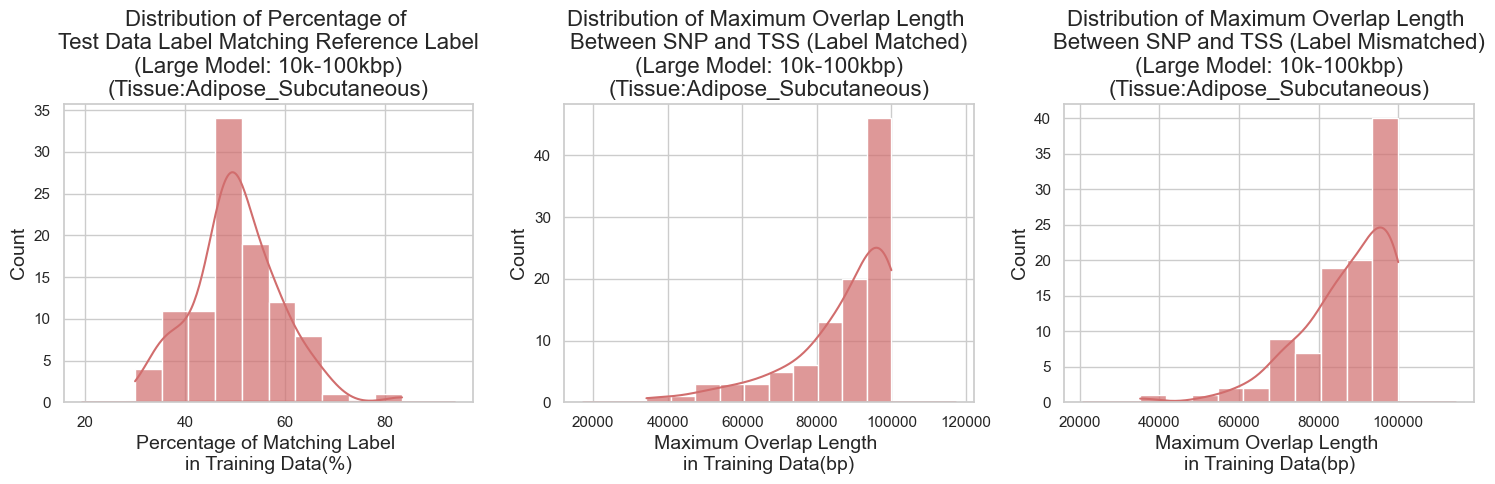

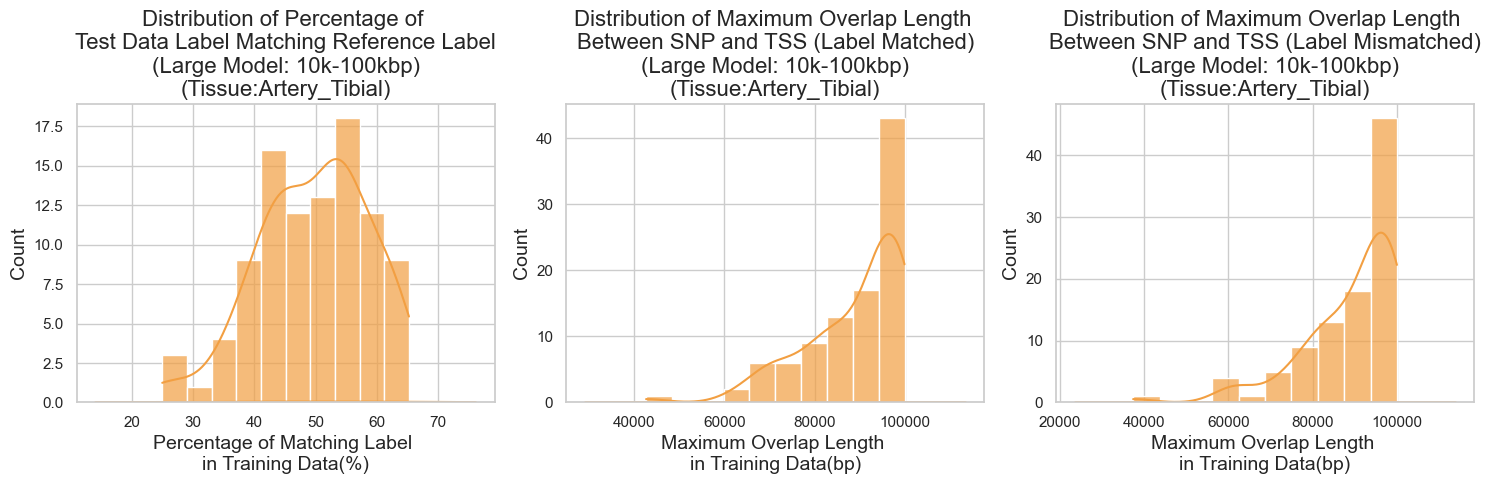

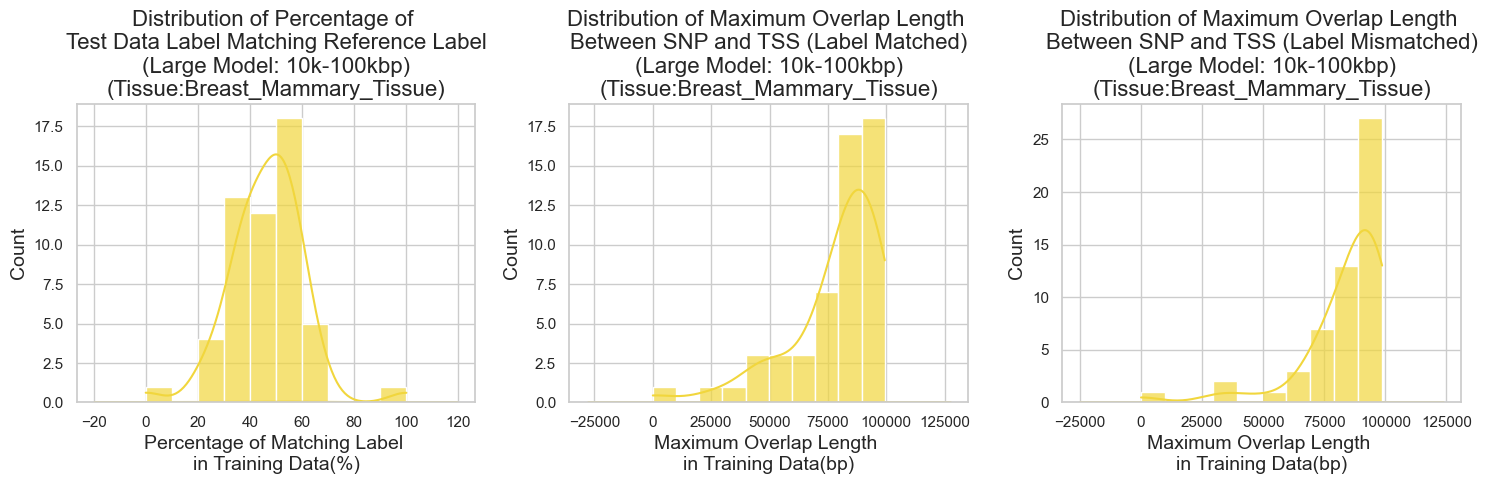

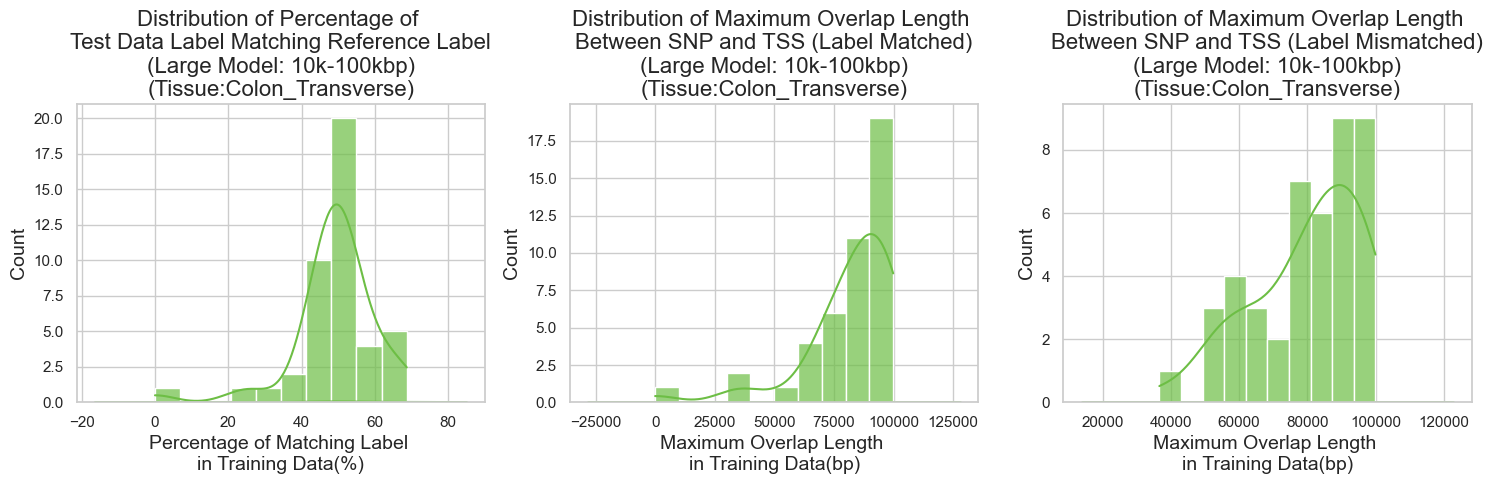

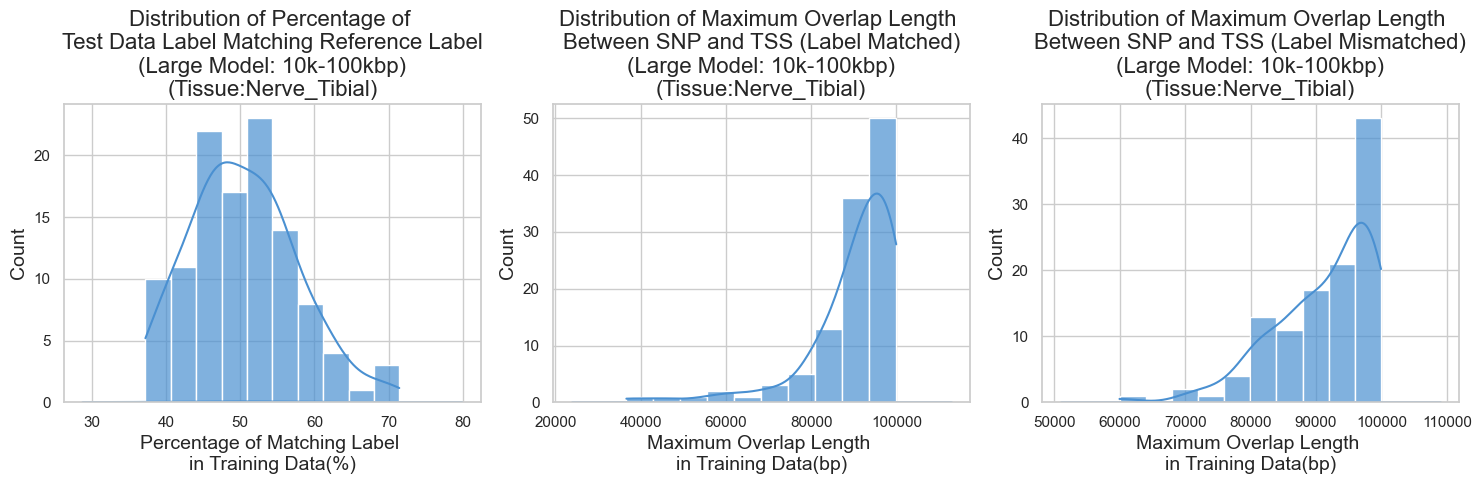

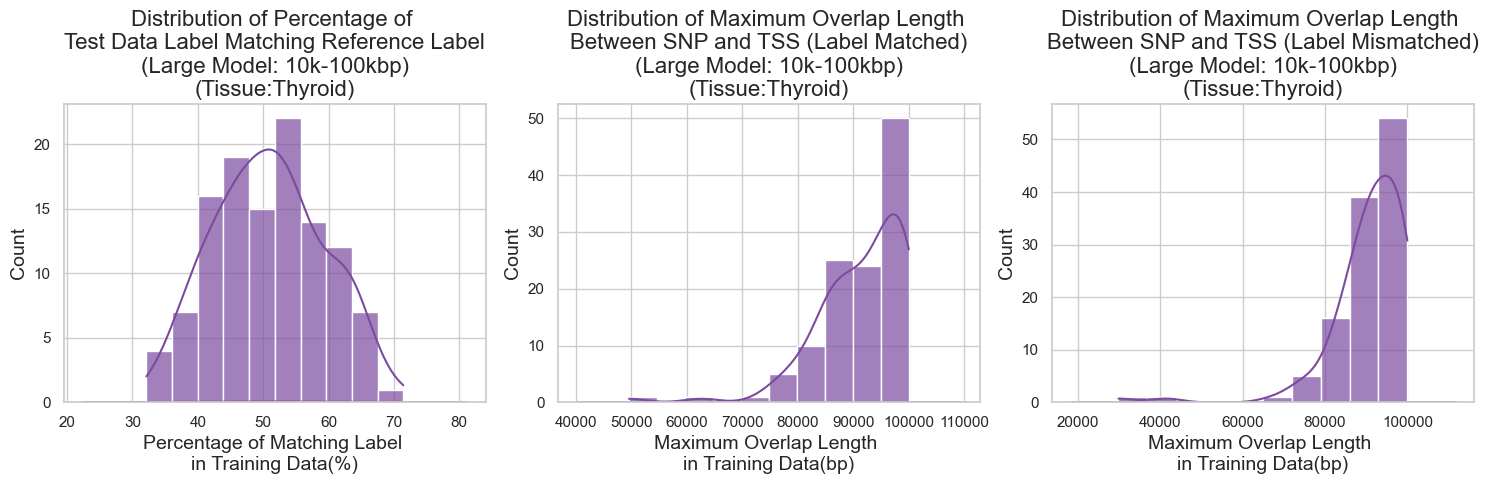

In [5]:
model_size = 'large'
max_distance = 100_000
for i in range(6):

    tissue = compare_tissue_list[i]

    train_data = pd.read_pickle('../datasets/tissue_specific/' + model_size + '/train_' + model_size + '_' + tissue + '.pkl')[['variant_id','tss_distance','label','bulk']]
    test_data = pd.read_pickle('../datasets/tissue_specific/' + model_size + '/test_' + model_size + '_' + tissue + '.pkl')[['variant_id','tss_distance','label','bulk']]
    #print(test_data.head())

    test_data[['label_match_percentage', 'bulk_match_percentage', 'max_label_overlap_length', 'max_label_mismatch_overlap_length']] = test_data.apply(
        lambda row: pd.Series(calculate_similarity_for_test(row, train_data, max_distance)), axis=1)
    #print(test_data.head())

    # Set up the figure and axes for plotting in a single row
    plt.figure(figsize=(15, 5))

    # Plot label_match_percentage distribution
    plt.subplot(1, 3, 1)
    sns.histplot(test_data['label_match_percentage'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['label_match_percentage'], color=colors[i], lw=2)
    plt.title('Distribution of Percentage of \nTest Data Label Matching Reference Label\n(Large Model: 10k-100kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Percentage of Matching Label \nin Training Data(%)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Plot max_label_overlap_length distribution
    plt.subplot(1, 3, 2)
    sns.histplot(test_data['max_label_overlap_length'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['max_label_overlap_length'], color=colors[i], lw=2)
    plt.title('Distribution of Maximum Overlap Length \nBetween SNP and TSS (Label Matched)\n(Large Model: 10k-100kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Maximum Overlap Length \nin Training Data(bp)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Plot max_label_mismatch_overlap_length distribution
    plt.subplot(1, 3, 3)
    sns.histplot(test_data['max_label_mismatch_overlap_length'], kde=True, color=colors[i], bins=10, alpha=0.7, stat='count')
    sns.kdeplot(test_data['max_label_mismatch_overlap_length'], color=colors[i], lw=2)
    plt.title('Distribution of Maximum Overlap Length \nBetween SNP and TSS (Label Mismatched)\n(Large Model: 10k-100kbp)\n(Tissue:' + tissue + ')', fontsize=16)
    plt.xlabel('Maximum Overlap Length \nin Training Data(bp)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.savefig("images/tissue-specific/split-kde-" + model_size + '_' + tissue + ".png", dpi=300, bbox_inches = 'tight')
    plt.show()